In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict_proba(X_test[:5])

array([[3.10179769e-02, 9.68982023e-01],
       [9.99647982e-01, 3.52018216e-04],
       [4.40588468e-01, 5.59411532e-01],
       [6.10542466e-02, 9.38945753e-01],
       [8.24508132e-01, 1.75491868e-01]])

In [ ]:
# max(Class0 , CLass1)
# Class1 > 0.5 ==> 1 else 0

In [ ]:
(model.predict_proba(X_test[:5])[:,1] > 0.5).astype(int)

array([1, 0, 1, 1, 0])

In [ ]:
model.predict(X_test[:5, :])

array([1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test))) # Threshold = 0.5

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
print(classification_report(y_test, (model.predict_proba(X_test)[:,1] > 0.2).astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.96      1.00      0.98        90

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds, = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

In [ ]:
precision[:5]

array([0.62937063, 0.63380282, 0.63829787, 0.64285714, 0.64748201])

In [ ]:
recall[:5]

array([1., 1., 1., 1., 1.])

In [ ]:
thresholds[:5]

array([5.31086312e-23, 3.93340883e-13, 3.69113218e-11, 1.60418948e-10,
       1.19237458e-09])

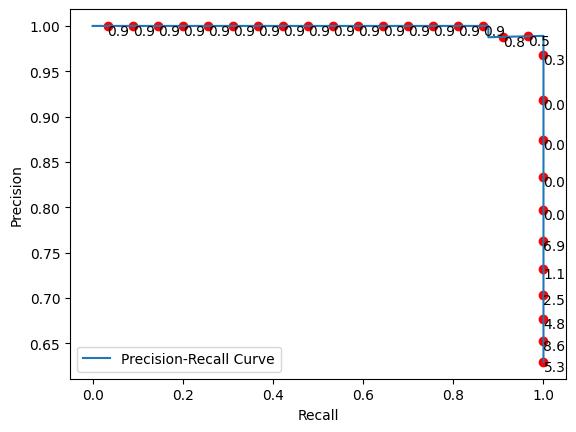

In [ ]:
from matplotlib import pyplot as plt
plt.plot(recall, precision, label='Precision-Recall Curve')
for i in range(0, thresholds.shape[0], 5):
  plt.annotate(str(thresholds[i])[:3], xy = (recall[i], precision[i]), xytext = (recall[i], precision[i] - 0.01))
  plt.scatter(recall[i], precision[i], color = 'red')
#plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
recall[0]

1.0